# The Forward Eular Method

Assume we have an ODE such as

 $
    dN/dt = rN(t)$                                                                                               


this describe an exponential growth, r is growth-rate constant and t is time. We can solve it numerically at a given time step $ \Delta t $, starting at value N, and update the new value of N at $ t + \Delta t $, the mathematic phrase is:

$$ N(t + \Delta t) = N(t) + rN(t)\Delta t $$

The initial value $ N = 10 $ and $ r = 1$, and we take time step $ \Delta t = 0.1 $

So the change of N is $ \Delta N = rN \Delta t = 1 $

Now we know compute the new value of N at time $ t + \Delta t $ as  $$ N(t + \Delta t) = N(t) + \Delta N = 10 + 1 = 11$$

Then we can repeate the step to go forward. We have to be aware of a major point that this process involves error as we have to choose a sufficiently small step of time so that at most 1 computable event must occur. For instance, if we are integrating exponential growth of bacteria, we don't want to take time steps larger than a cell divison. The requirement is called the **Courant-Friedrichs-Lewy condition**.

## <font color = grey > Numerically integrating exponential growth </font>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# To make pretty plots
import seaborn as sns
rc = {'lines.linewidth': 2, 'axes.labelsize':14, 'axes.titlesize':14, 'xtick.labelsize':14, 'ytick.labelsize': 14}
sns.set(rc = rc)

To numerically integrate $ dN/dt = rN(t) $, we need to specify parameters involved, i.e. $ N_0, r $  and $ \Delta t$.

In [4]:
# set parameters for ODE
N_0 = 1
r = 0.03 # unit is min^-1

# set parameters for integration
dt = 0.1  # unit min
total_time = 120 # min

In order to save all N as it increase with time, we set up an array with the first value in N_t array being set to N_0 as specific number as set above.

In [5]:
# determine the number of steps that will be taken
num_steps = int(total_time/dt)

In [6]:
# initialize an array with length of num_steps to store values of N. This array should be occupied with 0s.
N_t = np.zeros(num_steps)
# set the initial N_0 as the first value in this array
N_t[0] = N_0

Now it is time to compute the numerial integraion, by looping through the N_t array and filling in the computed N as we go. At each time point: $ N(t) = N(t- \Delta t) + dN $, where $ dN $ is $ rN(t- \Delta t)\Delta t $, and $ t - \Delta t$ is the previous time point.

In [7]:
# numerically integrate by looping through N_t
for t in range(1, num_steps):
    
    # 1st, calculate dN using the t-1 time point entry of N_t.
    dN = r * N_t[t-1] * dt
    
    # update the current N_t array
    N_t[t] = N_t[t-1] + dN

Now we know N_t, if we want to plot N_t over t, so we need to define the t values as array as one of the axis. We already know how many time points we want which is num_steps, but we still need to make them as time series.

In [8]:
# make array of time values
times = np.arange(num_steps)*dt

Text(0, 0.5, 'N')

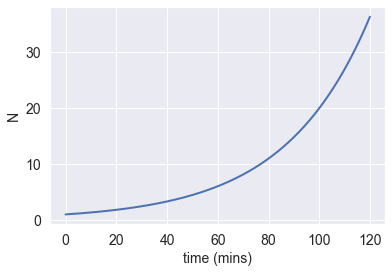

In [9]:
# Ready to plot N_t over t.
plt.plot(times, N_t)
plt.xlabel('time (mins)')
plt.ylabel('N')

### <font color='grey'>Comparison with the numerical solution - $ N(t) = N_0 e^{rt} $ </font> 

We can plot the known solution of $N(t) = N_0e^{rt} $ on top of numerical integration above.

In [18]:
# compute the know solution
solution = N_0 * np.exp(r*times)


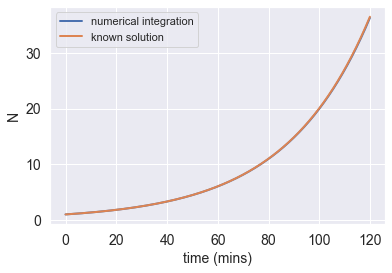

In [20]:
 
plt.plot(times, N_t) # plot both integration
plt.plot(times, solution) # plot the known solution
plt.xlabel('time (mins)')
plt.ylabel('N')
plt.legend(['numerical integration', 'known solution'])

It is clear that our numerical integratoin and the known solution are so similar that two lines are overlapping.
A sufficiently small $ \Delta t $ is essential for numerical integration to work. When dt increase, the numerical integration will deviate more and more from the known solution. The reason is in exponential growth, the rate of growth is always increaseing so if we take too large time step, we will fail to capture the constant increase.